In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/district wise rainfall normal.csv") 
print(df)

                   STATE_UT_NAME        DISTRICT  ...  Jun-Sep  Oct-Dec
0    ANDAMAN And NICOBAR ISLANDS         NICOBAR  ...   1207.2    892.1
1    ANDAMAN And NICOBAR ISLANDS   SOUTH ANDAMAN  ...   1757.2    705.3
2    ANDAMAN And NICOBAR ISLANDS   N & M ANDAMAN  ...   1884.4    574.7
3              ARUNACHAL PRADESH           LOHIT  ...   1848.5    231.0
4              ARUNACHAL PRADESH      EAST SIANG  ...   3008.4    268.1
..                           ...             ...  ...      ...      ...
636                       KERALA          IDUKKI  ...   2276.2    564.2
637                       KERALA        KASARGOD  ...   3007.5    337.9
638                       KERALA  PATHANAMTHITTA  ...   1715.7    624.2
639                       KERALA         WAYANAD  ...   2632.1    332.5
640                  LAKSHADWEEP     LAKSHADWEEP  ...    998.5    333.6

[641 rows x 19 columns]


In [ ]:
print("How many null values present?\n",df.isnull().sum())

How many null values present?
 STATE_UT_NAME    0
DISTRICT         0
JAN              0
FEB              0
MAR              0
APR              0
MAY              0
JUN              0
JUL              0
AUG              0
SEP              0
OCT              0
NOV              0
DEC              0
ANNUAL           0
Jan-Feb          0
Mar-May          0
Jun-Sep          0
Oct-Dec          0
dtype: int64


In [ ]:
print("Checking unique values in data:\n")
print(df.nunique())

Checking unique values in data:

STATE_UT_NAME     35
DISTRICT         637
JAN              301
FEB              309
MAR              349
APR              372
MAY              457
JUN              547
JUL              570
AUG              569
SEP              543
OCT              507
NOV              349
DEC              263
ANNUAL           591
Jan-Feb          399
Mar-May          511
Jun-Sep          592
Oct-Dec          524
dtype: int64


In [ ]:
India = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/rainfall in india 1901-2015.csv",sep=",")

In [ ]:
India.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
India.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [ ]:
India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

Data Cleaning by replacing the NULL values with mean values.

In [ ]:
India['JAN'].fillna((India['JAN'].mean()), inplace=True)
India['FEB'].fillna((India['FEB'].mean()), inplace=True)
India['MAR'].fillna((India['MAR'].mean()), inplace=True)
India['APR'].fillna((India['APR'].mean()), inplace=True)
India['MAY'].fillna((India['MAY'].mean()), inplace=True)
India['JUN'].fillna((India['JUN'].mean()), inplace=True)
India['JUL'].fillna((India['JUL'].mean()), inplace=True)
India['AUG'].fillna((India['AUG'].mean()), inplace=True)
India['SEP'].fillna((India['SEP'].mean()), inplace=True)
India['OCT'].fillna((India['OCT'].mean()), inplace=True)
India['NOV'].fillna((India['NOV'].mean()), inplace=True)
India['DEC'].fillna((India['DEC'].mean()), inplace=True)
India['ANNUAL'].fillna((India['ANNUAL'].mean()), inplace=True)
India['Jan-Feb'].fillna((India['Jan-Feb'].mean()), inplace=True)
India['Mar-May'].fillna((India['Mar-May'].mean()), inplace=True)
India['Jun-Sep'].fillna((India['Jun-Sep'].mean()), inplace=True)
India['Oct-Dec'].fillna((India['Oct-Dec'].mean()), inplace=True)

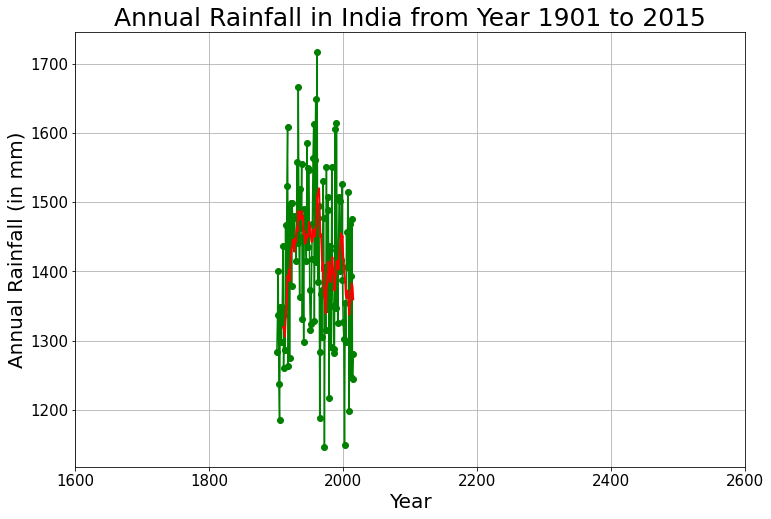

In [ ]:
ax=India.groupby("YEAR").mean()['ANNUAL'].plot(xlim=(1600,2600),color='g',marker='o',linestyle='-',linewidth=1.5,figsize=(12,8));
India['MA10'] = India.groupby('YEAR').mean()['ANNUAL'].rolling(10).mean()
India.MA10.plot(color='r',linewidth=2)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall in India from Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

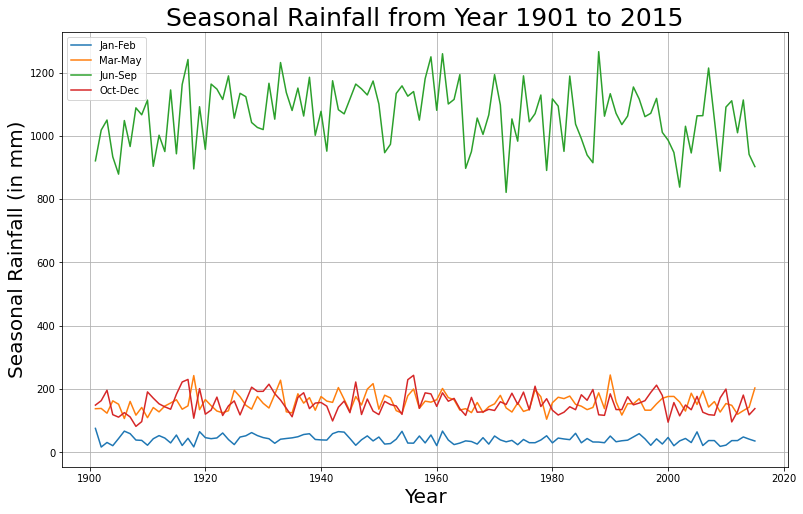

In [ ]:
India[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").mean().plot(figsize=(13,8));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=20)
plt.title('Seasonal Rainfall from Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

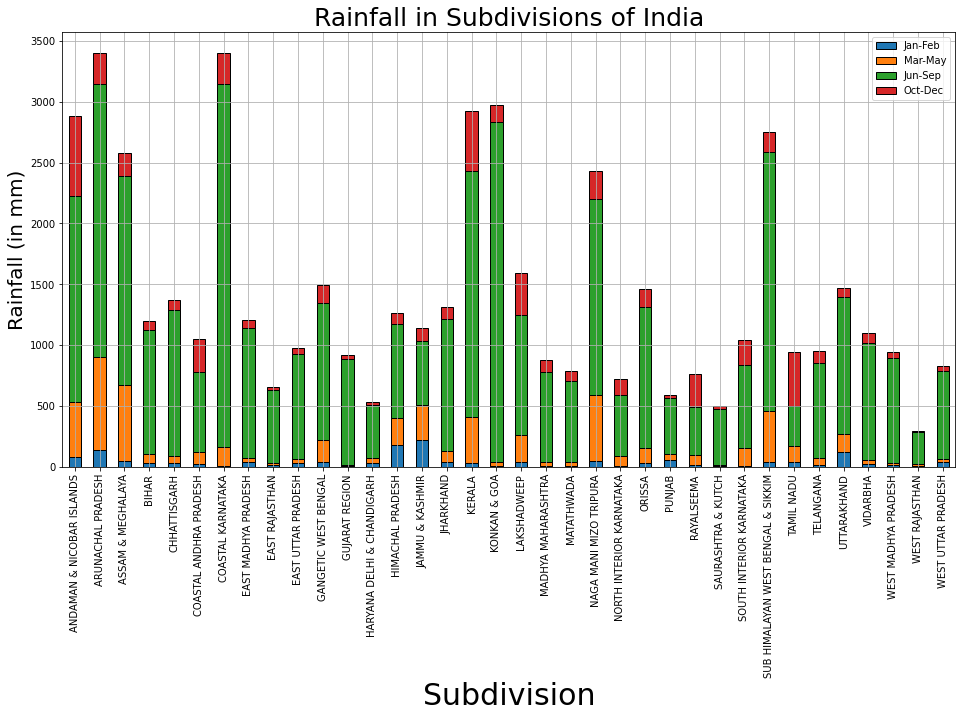

In [ ]:
India[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").mean().plot.bar(width=0.5,edgecolor='k',align='center',stacked=True,figsize=(16,8));
plt.xlabel('Subdivision',fontsize=30)
plt.ylabel('Rainfall (in mm)',fontsize=20)
plt.title('Rainfall in Subdivisions of India',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

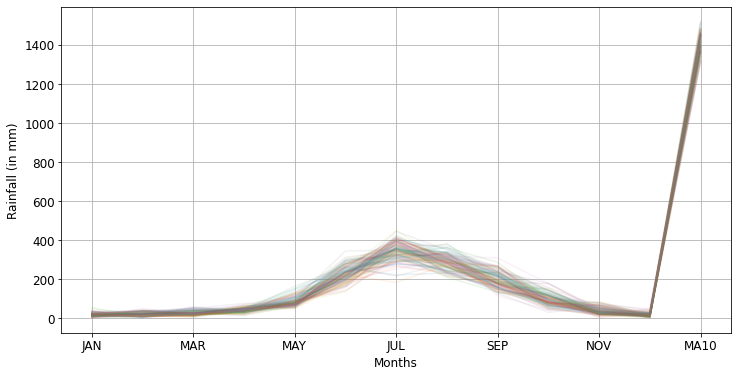

In [ ]:
drop_col = ['ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']

fig, ax = plt.subplots()

(India.groupby(by='YEAR')
 .mean()
 .drop(drop_col, axis=1)
 .T
 .plot(alpha=0.1, figsize=(12, 6), legend=False, fontsize=12, ax=ax)
)
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Rainfall (in mm)', fontsize=12)
plt.grid()
plt.ioff()

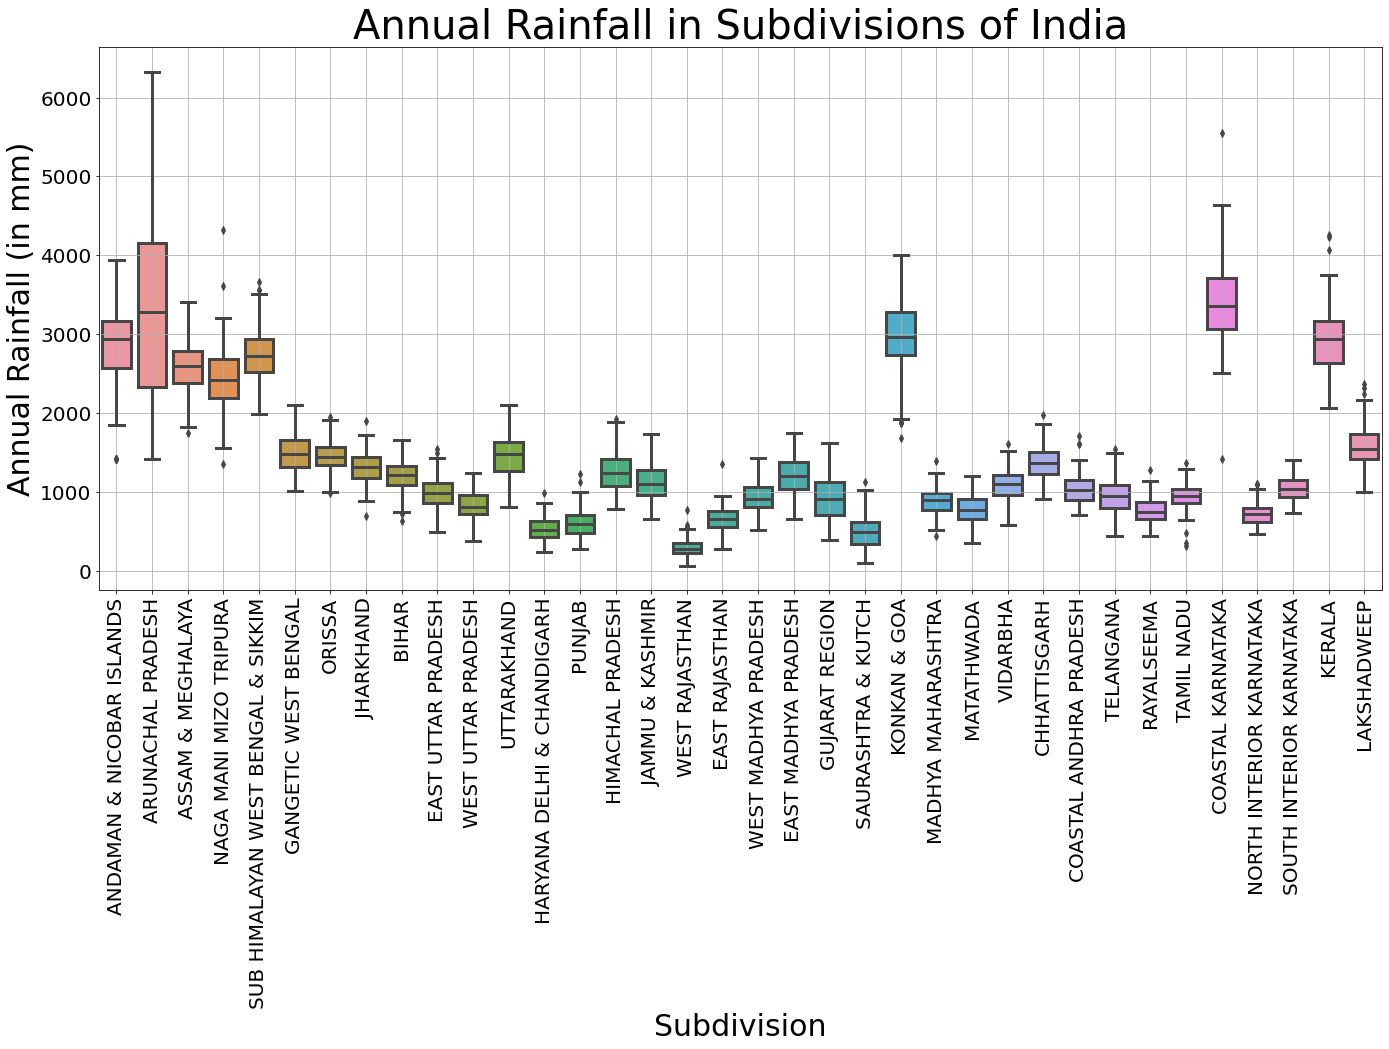

In [ ]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=India,width=0.8,linewidth=3)
ax.set_xlabel('Subdivision',fontsize=30)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=30)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20,rotation=0)
plt.grid()
plt.ioff()

TypeError: ignored

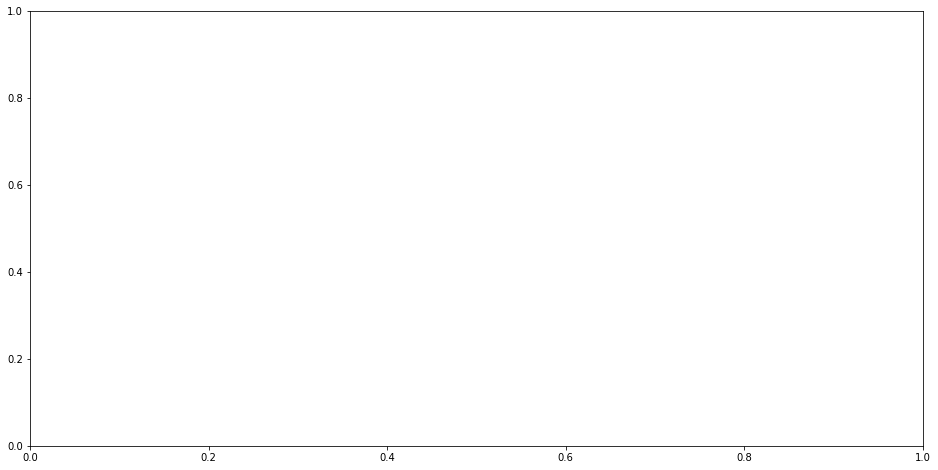

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
India.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot('bar', color='b',width=0.65,linewidth=3,edgecolor='k',align='center',title='Subdivision wise Average Annual Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (in mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


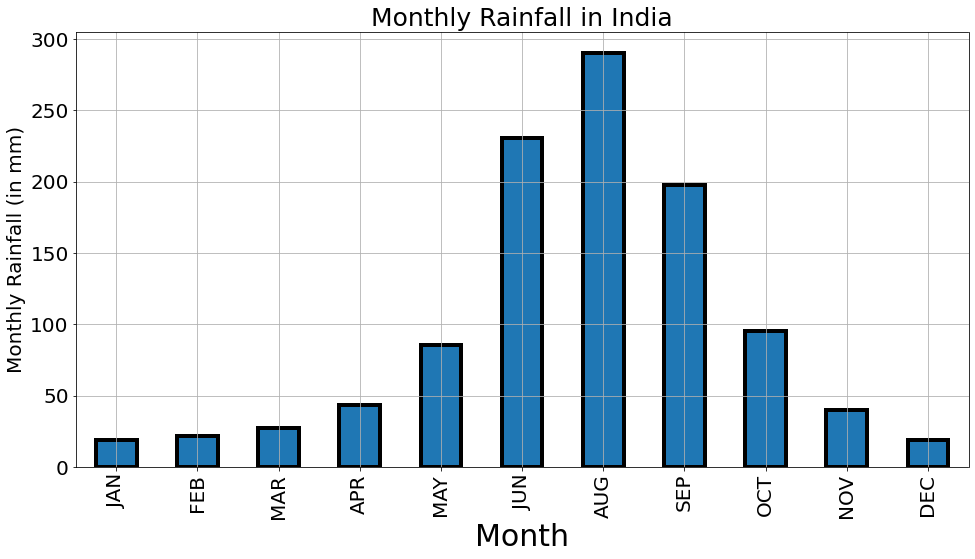

In [ ]:
ax=India[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall (in mm)',fontsize=20)
plt.title('Monthly Rainfall in India',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

In [ ]:
India[['AUG']].mean()

AUG    290.263497
dtype: float64

In [ ]:
Kerala =India[India.SUBDIVISION == 'KERALA']
Kerala


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MA10
3887,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1,NaN
3888,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2,NaN
3889,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1,NaN
3890,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3,NaN
3891,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,KERALA,2011,20.5,45.7,24.1,165.2,124.2,788.5,536.8,492.7,391.2,227.2,169.7,49.5,3035.1,66.2,313.5,2209.1,446.3,NaN
3998,KERALA,2012,7.4,11.0,21.0,171.1,95.3,430.3,362.6,501.6,241.1,187.5,112.9,9.4,2151.1,18.3,287.4,1535.6,309.8,NaN
3999,KERALA,2013,3.9,40.1,49.9,49.3,119.3,1042.7,830.2,369.7,318.6,259.9,154.9,17.0,3255.4,43.9,218.5,2561.2,431.8,NaN
4000,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,14.9,364.5,2164.8,502.1,NaN


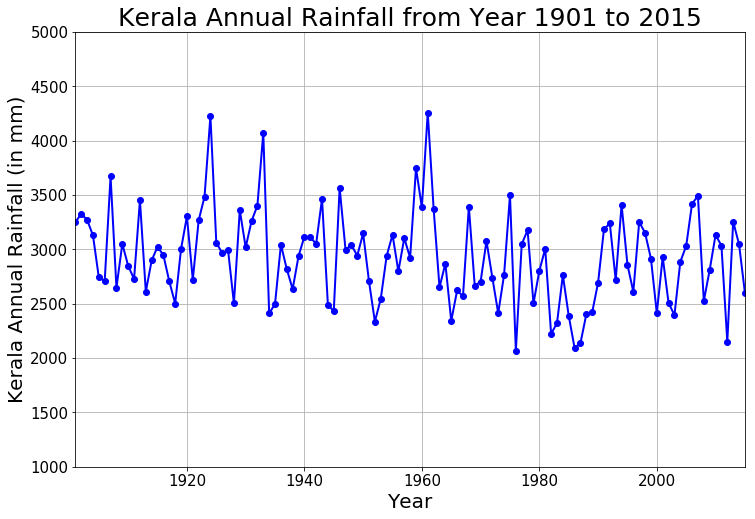

In [ ]:
ax=Kerala.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(1000,5000),color='b',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
#Kerala['MA10'] = Kerala.groupby('YEAR').mean()['ANNUAL'].rolling(10).mean()
#Kerala.MA10.plot(color='r',linewidth=4)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Kerala Annual Rainfall (in mm)',fontsize=20)
plt.title('Kerala Annual Rainfall from Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

Predict the overall rainfall recieved by Kerala.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(India[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print('Average annual rainfall received by Kerala=',int(Kerala['ANNUAL'].mean()),'mm')

Average annual rainfall received by Kerala= 2925 mm
